In [79]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt

wave_df = pd.read_csv('/Users/JKovach/Downloads/Coastal Data System - Waves (Mooloolaba) 01-2017 to 06 - 2019.csv')
wave_df.head()

# Hs - Significant Height
# Hmax - Max Height
# Tz - zero upcrossing wave period 
# Tp - peak energy period wave period
# Peak Direction - relative degree to true north
# SST - Sea Surface Temp

,Date/Time,Hs,Hmax,Tz,Tp,Peak Direction,SST
0,01/01/2017 00:00,-99.900,-99.90,-99.900,-99.900,-99.9,-99.90
1,01/01/2017 00:30,0.875,1.39,4.421,4.506,-99.9,-99.90
2,01/01/2017 01:00,0.763,1.15,4.520,5.513,49.0,25.65
3,01/01/2017 01:30,0.770,1.41,4.582,5.647,75.0,25.50
4,01/01/2017 02:00,0.747,1.16,4.515,5.083,91.0,25.45


In [80]:
wave_df.replace(to_replace=-99.9, value=np.nan, inplace=True)
wave_df.dropna(how='any')
wave_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43728 entries, 0 to 43727
Data columns (total 7 columns):
Date/Time         43728 non-null object
Hs                43643 non-null float64
Hmax              43643 non-null float64
Tz                43643 non-null float64
Tp                43643 non-null float64
Peak Direction    43457 non-null float64
SST               43466 non-null float64
dtypes: float64(6), object(1)
memory usage: 2.3+ MB


/miniconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/miniconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


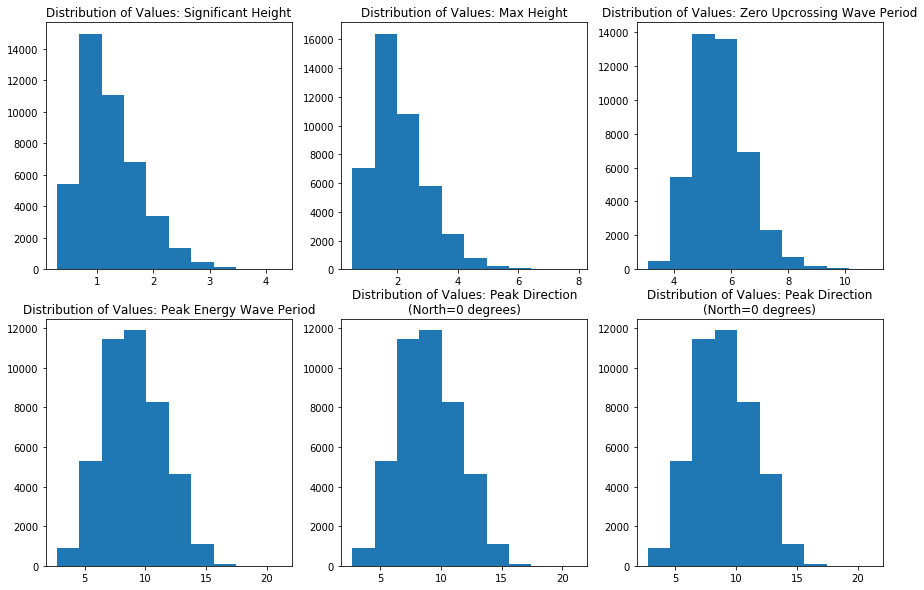

In [81]:
plt.figure(figsize=(15,10))

plt.subplot(2,3,1)
plt.hist(wave_df['Hs'])
plt.title('Distribution of Values: Significant Height')

plt.subplot(2,3,2)
plt.hist(wave_df['Hmax'])
plt.title('Distribution of Values: Max Height')

plt.subplot(2,3,3)
plt.hist(wave_df['Tz'])
plt.title('Distribution of Values: Zero Upcrossing Wave Period')

plt.subplot(2,3,4)
plt.hist(wave_df['Tp'])
plt.title('Distribution of Values: Peak Energy Wave Period')

plt.subplot(2,3,5)
plt.hist(wave_df['Tp'])
plt.title('Distribution of Values: Peak Direction\n(North=0 degrees)')

plt.subplot(2,3,6)
plt.hist(wave_df['Tp'])
plt.title('Distribution of Values: Peak Direction\n(North=0 degrees)')
plt.show()

Hs      1.000000
Hmax    0.972867
Tz      0.403445
SST     0.255359
Name: Hs, dtype: float64
      Hs  Hmax     Tz    SST
2  0.763  1.15  4.520  25.65
3  0.770  1.41  4.582  25.50
4  0.747  1.16  4.515  25.45
5  0.718  1.61  4.614  25.45
6  0.707  1.34  4.568  25.50


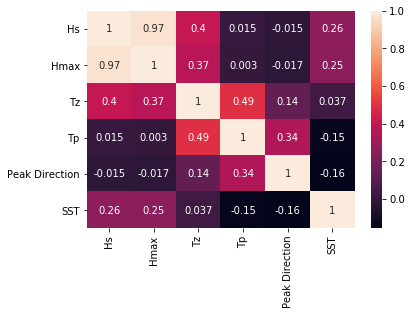

In [82]:
# Determine variable correlation for OLS
import seaborn as sns

cor = wave_df.corr()
sns.heatmap(cor, annot=True)

cor_target = abs(cor['Hs'])
relevant_features = cor_target[cor_target>0.25]
print(relevant_features)
wave_df = wave_df.dropna(how='any').drop(['Date/Time', 'Tp', 'Peak Direction'], axis=1)
print(wave_df.head())

In [84]:
# OLS Model
import statsmodels.api as sm
from sklearn.preprocessing import scale

Y = wave_df['Hs']
X = sm.add_constant(scale(wave_df))
results = sm.OLS(Y,X).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                     Hs   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.488e+32
Date:                Tue, 17 Sep 2019   Prob (F-statistic):               0.00
Time:                        17:09:35   Log-Likelihood:             1.4088e+06
No. Observations:               43454   AIC:                        -2.818e+06
Df Residuals:                   43449   BIC:                        -2.818e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2378   9.66e-18   1.28e+17      0.0

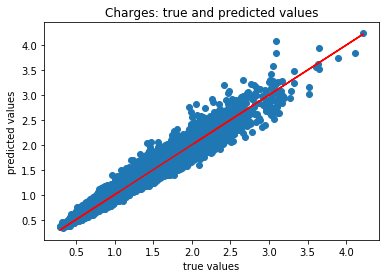

Mean absolute error of the prediction is: 0.08708565041976439
Mean squared error of the prediction is: 0.014324879536119857
Root mean squared error of the prediction is: 0.11968658878972137
Mean absolute percentage error of the prediction is: 7.123835790815907


In [119]:
# Split Data to training and testing sets
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from statsmodels.tools.eval_measures import mse, rmse

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)
X_train = sm.add_constant(X_train)
results = sm.OLS(y_train, X_train).fit()

X_test = sm.add_constant(X_test)
y_preds = results.predict(X_test)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.show()

print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))



In [91]:
print(wave_df.Hs.max())
print(wave_df.Hs.min())

def wave_class(series):
    if series > 4:
        return 4
    elif series > 3:
        return 3
    elif series > 2:
        return 2
    elif series > 1:
        return 1
    else:
        return 0 

wave_df['height_class'] = wave_df['Hs'].apply(wave_class)

4.257
0.294


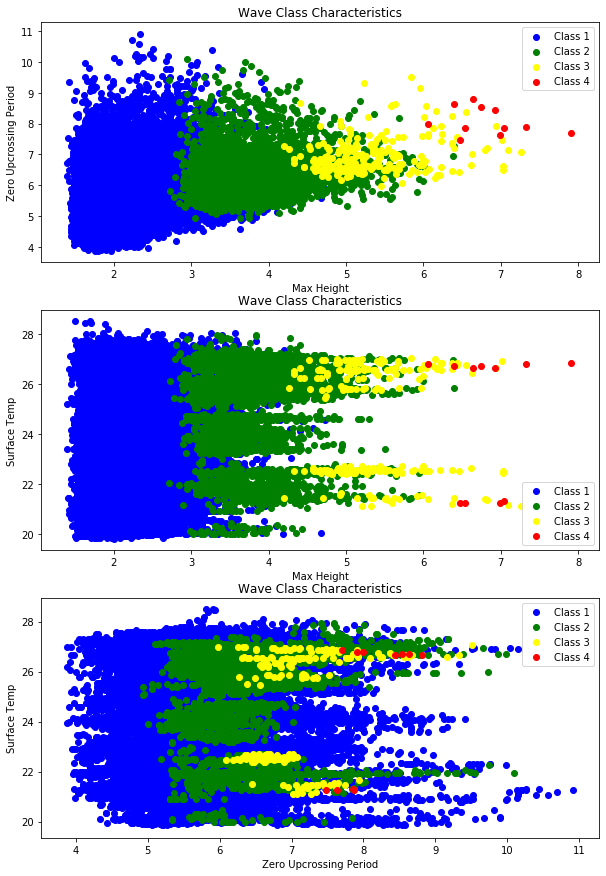

In [93]:
# Visually inspect data scatter for KNN
plt.figure(figsize=(10,15))

plt.subplot(3,1,1)
plt.scatter(
    wave_df[wave_df['height_class']==1].Hmax,
    wave_df[wave_df['height_class']==1].Tz,
    color='blue'
)
plt.scatter(
    wave_df[wave_df['height_class']==2].Hmax,
    wave_df[wave_df['height_class']==2].Tz,
    color='green'
)
plt.scatter(
    wave_df[wave_df['height_class']==3].Hmax,
    wave_df[wave_df['height_class']==3].Tz,
    color='yellow'
)
plt.scatter(
    wave_df[wave_df['height_class']==4].Hmax,
    wave_df[wave_df['height_class']==4].Tz,
    color='red'
)
plt.legend(['Class 1', 'Class 2', 'Class 3', 'Class 4'])
plt.title('Wave Class Characteristics')
plt.xlabel('Max Height')
plt.ylabel('Zero Upcrossing Period')

plt.subplot(3,1,2)
plt.scatter(
    wave_df[wave_df['height_class']==1].Hmax,
    wave_df[wave_df['height_class']==1].SST,
    color='blue'
)
plt.scatter(
    wave_df[wave_df['height_class']==2].Hmax,
    wave_df[wave_df['height_class']==2].SST,
    color='green'
)
plt.scatter(
    wave_df[wave_df['height_class']==3].Hmax,
    wave_df[wave_df['height_class']==3].SST,
    color='yellow'
)
plt.scatter(
    wave_df[wave_df['height_class']==4].Hmax,
    wave_df[wave_df['height_class']==4].SST,
    color='red'
)
plt.legend(['Class 1', 'Class 2', 'Class 3', 'Class 4'])
plt.title('Wave Class Characteristics')
plt.xlabel('Max Height')
plt.ylabel('Surface Temp')

plt.subplot(3,1,3)
plt.scatter(
    wave_df[wave_df['height_class']==1].Tz,
    wave_df[wave_df['height_class']==1].SST,
    color='blue'
)
plt.scatter(
    wave_df[wave_df['height_class']==2].Tz,
    wave_df[wave_df['height_class']==2].SST,
    color='green'
)
plt.scatter(
    wave_df[wave_df['height_class']==3].Tz,
    wave_df[wave_df['height_class']==3].SST,
    color='yellow'
)
plt.scatter(
    wave_df[wave_df['height_class']==4].Tz,
    wave_df[wave_df['height_class']==4].SST,
    color='red'
)
plt.legend(['Class 1', 'Class 2', 'Class 3', 'Class 4'])
plt.title('Wave Class Characteristics')
plt.xlabel('Zero Upcrossing Period')
plt.ylabel('Surface Temp')

plt.show()

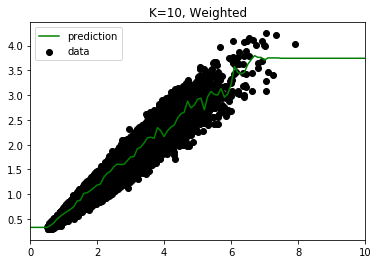

In [124]:
# KNN Model
from sklearn import neighbors

knn = neighbors.KNeighborsRegressor(n_neighbors=10)
X = pd.DataFrame(wave_df['Hmax'])
Y = wave_df.Hs
knn.fit(X,Y)

T = np.arange(0, 50, 0.1)[:, np.newaxis]
Y_ = knn.predict(T)

plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.xlim(0,10)
plt.title('K=10, Unweighted')
plt.show()

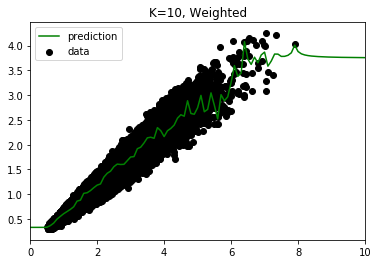

In [126]:
knn = neighbors.KNeighborsRegressor(n_neighbors=10, weights='distance')
X = pd.DataFrame(wave_df['Hmax'])
Y = wave_df.Hs
knn.fit(X,Y)

T = np.arange(0, 50, 0.1)[:, np.newaxis]
Y_ = knn.predict(T)

plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.xlim(0,10)
plt.title('K=10, Weighted')
plt.show()

Based on the models, I think that the regression model better predicts wave height. First, the regression model is able to account for multi-dimensional data, whereas the KNN prediction only considers one dimension. Regression also accounts for continuous data not within its existing range and can predict based on pattern, demonstrated by the leveling of the trend line in the KNN model outside of the provided training data. Finally, the KNN seems more susceptible to overfitting as unknowns will tend to gravitate toward existing points rather than being fitted by a functional trend line. 